In [1]:
import json
import pandas as pd
import requests
import seaborn as sns

In [2]:
# We doen een "aanvraag" bij de API. Deze url werkt alleen als de rest server gestart is. 
response = requests.get('http://localhost:8080/medish_centrum_randstad/api/netlify?page=1')

In [3]:
# Checken wat voor data/type we binnen hebben gekregen
response.headers['content-type']

'application/json'

In [4]:
# Van de teruggekregen data maken we een pandas dataframe
df = pd.read_json(response.text)
df.head()

,status,total_nr_of_records,nr_of_pages,page_size,next,data
0,200,8192,82,100,http://localhost:8080/medish_centrum_randstad/...,"{'genetic': 84.0, 'length': 180.0, 'mass': 90...."
1,200,8192,82,100,http://localhost:8080/medish_centrum_randstad/...,"{'genetic': 84.0, 'length': 204.0, 'mass': 79...."
2,200,8192,82,100,http://localhost:8080/medish_centrum_randstad/...,"{'genetic': 84.0, 'length': 174.0, 'mass': 74...."
3,200,8192,82,100,http://localhost:8080/medish_centrum_randstad/...,"{'genetic': 84.0, 'length': 187.0, 'mass': 78...."
4,200,8192,82,100,http://localhost:8080/medish_centrum_randstad/...,"{'genetic': 84.0, 'length': 187.0, 'mass': 89...."


In [5]:
# wat we hier willen:

    # De data is opgeslagen in de 'data' kolom. De vorm waarin dit is opgeslagen is een dictionary (voor elke rij)
    # waarvan de keys de variabelen zijn, en de waardes de waardes voor elke 'patient'
    
    # Nu willen we dus elk dictionary verwerken tot een rij in het dataframe, zodat we een rij hebben voor elke patient
    

# Eerst heb ik alle dictionaries in een lijst gezet, om ze als het ware uit het "oude" dataframe te halen:

data_list = df.data.values.tolist()
    
# Hier kunnen we inspecteren hoe het eerste item, i.e., de eerste rij, eruit ziet:
print(data_list[0])
    

{'genetic': 84.0, 'length': 180.0, 'mass': 90.0, 'exercise': 2.0, 'smoking': 9.0, 'alcohol': 1.0, 'sugar': 2.0, 'lifespan': 86.0}


In [6]:
# Nu is het zaak om de dictionaries uit de gemaakte lijst allemaal samen te voegen in een datatframe

df_final = pd.DataFrame.from_dict(data_list)

# We kunnen ons nieuwe dataframe even bekijken:

print(df_final.head())
print()
print(df_final.tail())


   genetic  length  mass  exercise  smoking  alcohol  sugar  lifespan
0     84.0   180.0  90.0       2.0      9.0      1.0    2.0      86.0
1     84.0   204.0  79.0       3.0      2.0      7.0    3.0     100.0
2     84.0   174.0  74.0       3.0     20.0      3.0    2.0      87.0
3     84.0   187.0  78.0       2.0      6.0      5.0    3.0      91.0
4     84.0   187.0  89.0       2.0     12.0      0.0    2.0      83.0

      genetic  length  mass  exercise  smoking  alcohol  sugar  lifespan
8187     82.0   185.0  67.0       3.0     11.0      8.0    2.0      90.0
8188     82.0   183.0  72.0       2.0      1.0      5.0    4.0      88.0
8189     83.0   192.0  92.0       1.0     22.0      2.0    4.0      62.0
8190     81.0   175.0  60.0       3.0     13.0      7.0    2.0      93.0
8191     83.0   204.0  76.0       3.0      8.0      8.0    1.0      96.0


In [7]:
# Wat opvalt is dat het dataframe lijkt te zijn geordend op de variabel 'genetic', 
# bij het eerst x aantal rijen zien we dit terug:

df_final.head(30)

,genetic,length,mass,exercise,smoking,alcohol,sugar,lifespan
0,84.0,180.0,90.0,2.0,9.0,1.0,2.0,86.0
1,84.0,204.0,79.0,3.0,2.0,7.0,3.0,100.0
2,84.0,174.0,74.0,3.0,20.0,3.0,2.0,87.0
3,84.0,187.0,78.0,2.0,6.0,5.0,3.0,91.0
4,84.0,187.0,89.0,2.0,12.0,0.0,2.0,83.0
5,84.0,175.0,74.0,2.0,2.0,3.0,3.0,89.0
6,84.0,196.0,68.0,2.0,14.0,8.0,1.0,80.0
7,84.0,182.0,83.0,1.0,1.0,8.0,3.0,77.0
8,84.0,176.0,91.0,1.0,17.0,1.0,2.0,73.0
9,84.0,180.0,74.0,1.0,5.0,9.0,2.0,73.0


In [9]:
# Om eventuele problemen met training/test subsets van de data te voorkomen, heb ik ervoor gekozen om de rijen
# in willekeurige volgorde te zetten:

df_final = df_final.sample(frac=1)

In [10]:
# Checken hoe het er nu uitziet:

print(df_final.head())
print()
print(df_final.tail())

# De rijen zijn nu inderdaad in willekeurige volgorde gezet.

      genetic  length  mass  exercise  smoking  alcohol  sugar  lifespan
4945     78.0   193.0  61.0       1.0     14.0      6.0    2.0      73.0
5690     80.0   183.0  90.0       1.0      5.0      1.0    2.0      78.0
7936     80.0   188.0  69.0       1.0      2.0      9.0    2.0      81.0
3942     77.0   179.0  75.0       1.0      0.0      6.0    5.0      67.0
6637     80.0   177.0  61.0       0.0     10.0      6.0    4.0      63.0

      genetic  length  mass  exercise  smoking  alcohol  sugar  lifespan
6591     78.0   163.0  66.0       0.0     16.0      4.0    2.0      60.0
362      82.0   182.0  83.0       2.0     22.0      5.0    3.0      73.0
5391     79.0   195.0  79.0       1.0     12.0      4.0    2.0      74.0
5219     78.0   171.0  60.0       3.0      1.0      6.0    4.0      95.0
453      82.0   161.0  85.0       1.0     20.0      6.0    2.0      59.0


In [12]:
# We hebben nu een werkbaar dataframe met al onze variabelen in de kolommen, en alle individuele patienten/datapunten
# in de rijen. We kunnen deze nu evt. als een nieuwe csv file exporteren, zonder index:

df_final.to_csv('data_clean.csv', index=False, sep=';')

In [13]:
# Als een van de eerste stappen in de IDE kunnen we kijken naar wat voor soort variabelen we hebben,
# van welk type deze variabelen zijn (categorisch of numeriek), en ook of er bijvoorbeeld waardes missen. 

# Eerst kijken we naar de datatypen van elke kolom
print(df_final.dtypes)
print(df_final.info())

genetic     float64
length      float64
mass        float64
exercise    float64
smoking     float64
alcohol     float64
sugar       float64
lifespan    float64
dtype: object
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8192 entries, 4945 to 453
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   genetic   8191 non-null   float64
 1   length    8190 non-null   float64
 2   mass      8191 non-null   float64
 3   exercise  8191 non-null   float64
 4   smoking   8191 non-null   float64
 5   alcohol   8191 non-null   float64
 6   sugar     8192 non-null   float64
 7   lifespan  8192 non-null   float64
dtypes: float64(8)
memory usage: 576.0 KB
None


In [14]:
# We zijn dat we enkel met getallen (floats en ints) te maken hebben. Nu is de vraag: zijn dit allemaal numerieke waardes
# op een schaal, of zijn er binnen de variabelen misschien categoriën?

print(df_final.nunique())

genetic      9
length      61
mass        53
exercise     5
smoking     23
alcohol     11
sugar        5
lifespan    71
dtype: int64


In [ ]:
# De variabelen 'length', 'mass', 'smoking' en 'lifespan' hebben de meeste verschillende waardes. 'Sugar' en 'exercise'
# lijken allebei te bestaan uit 5 verschillende waardes, variërend van 1 tot 5. Hier gaan we er even vanuit dat er geen 
# waardes tussen de hele getallen liggen, maar dit is wel iets om rekening mee te houden natuurlijk. 

In [15]:
# Voor de zekerheid bekijken we toch even of alle variabelen enkel hele getallen bevatten:

for c in df_final:
    print((df_final[c].fillna(-9999) % 1  == 0).all())

True
True
True
True
True
True
True
True


In [16]:
# Aangezien alle variabelen dus hele getallen zijn kunnen we alles omzetten naar integers, voor de eenvoud:

for c in df_final:
    c = df_final[c].fillna(0.0).astype(int)
    
print(df_final.dtypes)

genetic     float64
length      float64
mass        float64
exercise    float64
smoking     float64
alcohol     float64
sugar       float64
lifespan    float64
dtype: object


In [17]:
# Een volgende stap is om eens te kijken naar wat van de variabelen, hoe zit het bijvoorbeeld met de gemiddelde
# levensverwachting en suikerinname? 

df_final[['sugar', 'lifespan']].groupby(['sugar'], as_index=False).mean().sort_values(by='lifespan', ascending=False)

,sugar,lifespan
0,1.0,80.507310
1,2.0,77.254859
2,3.0,74.499805
3,4.0,71.190928
4,5.0,68.251969


In [18]:
# Hier zien we een duidelijke afname in levensverwachting naarmate 'sugar' een hogere waarde aanneemt. 
# Hetzelfde kunnen we doen voor 'exercise'

df_final[['exercise', 'lifespan']].groupby(['exercise'], as_index=False).mean().sort_values(by='lifespan')

,exercise,lifespan
0,0.0,63.641604
1,1.0,70.368166
2,2.0,79.245161
3,3.0,89.226933
4,4.0,95.465116


In [ ]:
# Wat niet zozeer interessant is voor ons toekomstige model, maar wel interessant: hoe is het gesteld met het bewegen
# in deze dataset; 

In [19]:
df_final['exercise'].value_counts()

1.0    3713
2.0    2790
3.0    1203
0.0     399
4.0      86
Name: exercise, dtype: int64

In [20]:
df_final.loc[df_final['exercise'] == 4]['sugar'].mean()

2.1627906976744184

           genetic    length      mass  exercise   smoking   alcohol  \
genetic   1.000000 -0.002037 -0.009954  0.004185 -0.010894  0.003882   
length   -0.002037  1.000000  0.017897 -0.007231 -0.008882  0.006830   
mass     -0.009954  0.017897  1.000000  0.004495  0.015918 -0.001889   
exercise  0.004185 -0.007231  0.004495  1.000000 -0.013092  0.005801   
smoking  -0.010894 -0.008882  0.015918 -0.013092  1.000000  0.001323   
alcohol   0.003882  0.006830 -0.001889  0.005801  0.001323  1.000000   
sugar    -0.006777 -0.015501  0.006886 -0.008972 -0.002332  0.013918   
lifespan  0.151803  0.179831 -0.201464  0.677454 -0.525276 -0.217047   

             sugar  lifespan  
genetic  -0.006777  0.151803  
length   -0.015501  0.179831  
mass      0.006886 -0.201464  
exercise -0.008972  0.677454  
smoking  -0.002332 -0.525276  
alcohol   0.013918 -0.217047  
sugar     1.000000 -0.263726  
lifespan -0.263726  1.000000  


<AxesSubplot: >

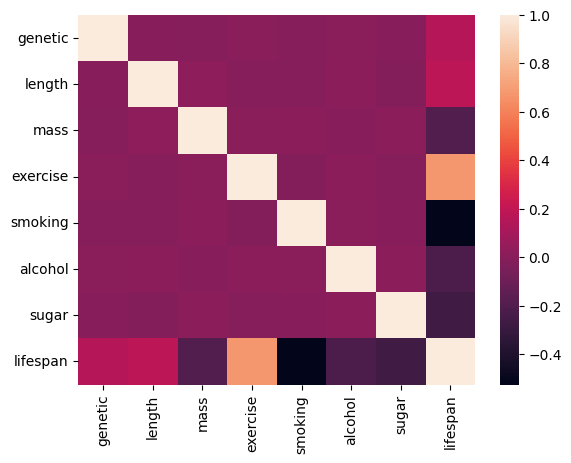

In [26]:
#We kunnen nu kijken naar eventuele onderlinge correlaties:
print(df_final.corr())
sns.heatmap(df_final.corr())

In [27]:
df_final.corr()['lifespan']

genetic     0.151803
length      0.179831
mass       -0.201464
exercise    0.677454
smoking    -0.525276
alcohol    -0.217047
sugar      -0.263726
lifespan    1.000000
Name: lifespan, dtype: float64

<AxesSubplot: xlabel='exercise'>

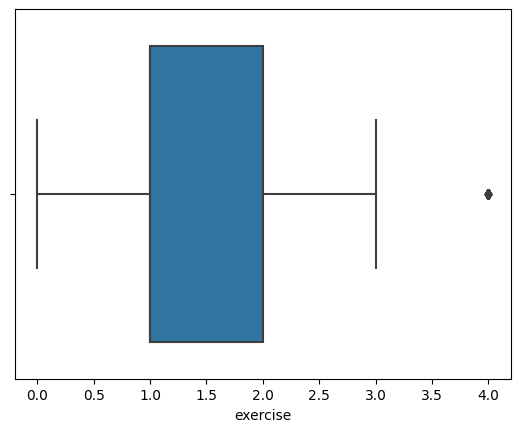

In [45]:
sns.boxplot(x=df_final['exercise'])

# outliers alleen bij 'sugar' en 'exercise'

In [57]:
#Vind alle null-waardes

df_null = df_final[df_final.isnull().any(axis=1)]

df_null

,genetic,length,mass,exercise,smoking,alcohol,sugar,lifespan
2556,79.0,NaN,75.0,2.0,0.0,6.0,3.0,82.0
4095,NaN,177.0,70.0,1.0,22.0,7.0,2.0,70.0
1631,80.0,NaN,90.0,2.0,7.0,7.0,3.0,74.0
2146,80.0,169.0,73.0,1.0,1.0,NaN,4.0,70.0
3433,78.0,176.0,NaN,3.0,3.0,3.0,4.0,89.0
2519,80.0,181.0,89.0,2.0,NaN,9.0,2.0,79.0
1421,81.0,188.0,91.0,NaN,0.0,10.0,4.0,65.0


In [71]:
#check of er duplicate rows zijn

duplicate_rows_df = df_final[df_final.duplicated()]
print(duplicate_rows_df.shape)

(0, 8)


In [68]:
#verwijdert alle rijen met null-waardes uit df
df1 = df_final.dropna() 

df1

,genetic,length,mass,exercise,smoking,alcohol,sugar,lifespan
4945,78.0,193.0,61.0,1.0,14.0,6.0,2.0,73.0
5690,80.0,183.0,90.0,1.0,5.0,1.0,2.0,78.0
7936,80.0,188.0,69.0,1.0,2.0,9.0,2.0,81.0
3942,77.0,179.0,75.0,1.0,0.0,6.0,5.0,67.0
6637,80.0,177.0,61.0,0.0,10.0,6.0,4.0,63.0
...,...,...,...,...,...,...,...,...
6591,78.0,163.0,66.0,0.0,16.0,4.0,2.0,60.0
362,82.0,182.0,83.0,2.0,22.0,5.0,3.0,73.0
5391,79.0,195.0,79.0,1.0,12.0,4.0,2.0,74.0
5219,78.0,171.0,60.0,3.0,1.0,6.0,4.0,95.0


           genetic    length      mass  exercise   smoking   alcohol  \
genetic   1.000000 -0.002151 -0.010059  0.004464 -0.011032  0.003612   
length   -0.002151  1.000000  0.017750 -0.007252 -0.008966  0.006750   
mass     -0.010059  0.017750  1.000000  0.004304  0.016148 -0.002182   
exercise  0.004464 -0.007252  0.004304  1.000000 -0.012758  0.005955   
smoking  -0.011032 -0.008966  0.016148 -0.012758  1.000000  0.001413   
alcohol   0.003612  0.006750 -0.002182  0.005955  0.001413  1.000000   
sugar    -0.006626 -0.015262  0.006780 -0.009249 -0.001368  0.013864   
lifespan  0.152144  0.179911 -0.201487  0.677365 -0.525613 -0.216818   

             sugar  lifespan  
genetic  -0.006626  0.152144  
length   -0.015262  0.179911  
mass      0.006780 -0.201487  
exercise -0.009249  0.677365  
smoking  -0.001368 -0.525613  
alcohol   0.013864 -0.216818  
sugar     1.000000 -0.263895  
lifespan -0.263895  1.000000  


<AxesSubplot: >

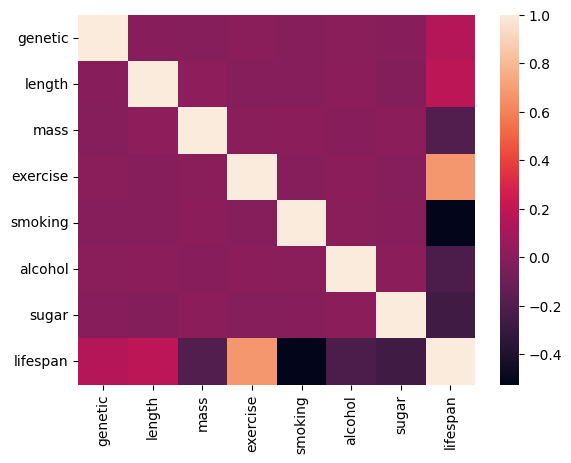

In [74]:
#We kunnen nu kijken naar eventuele onderlinge correlaties:
print(df1.corr())
sns.heatmap(df1.corr())

<AxesSubplot: xlabel='mass'>

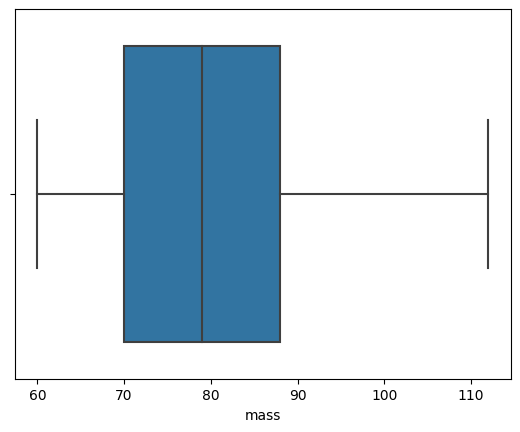

In [84]:
#check opnieuw outliers
sns.boxplot(x=df1['mass'])

#86 mensen hebben een exercise-score van 4. Dat is 1,05% en verwaarloosbaar. 125 hebben een max sugar-score (1,52%)
#Lifespan heeft uitschieters naar boven en beneden.